# 卷积神经网络
卷积神经网络（Convolutional Neural Networks, CNN）是一类包含卷积计算且具有深度结构的前馈神经网络（Feedforward Neural Networks），是深度学习（deep learning）的代表算法之一 。卷积神经网络具有表征学习（representation learning）能力，能够按其阶层结构对输入信息进行平移不变分类（shift-invariant classification），因此也被称为“平移不变人工神经网络（Shift-Invariant Artificial Neural Networks, SIANN）”。

卷积神经网络的实现原理在此不再进行讲述，我们直接进行模型的搭建。

## 1.CIFAR数据集介绍

该数据集共有60000张彩色图像，这些图像是32*32，分为10个类，每类6000张图。这里面有50000张用于训练，构成了5个训练批，每一批10000张图；另外10000用于测试，单独构成一批。测试批的数据里，取自10类中的每一类，每一类随机取1000张。抽剩下的就随机排列组成了训练批。注意一个训练批中的各类图像并不一定数量相同，总的来看训练批，每一类都有5000张图。

   

下面这幅图就是列举了10各类，每一类展示了随机的10张图片：
![cifar-10](./images/cifar.png)

## 2.模型搭建
先将模型搭建完成再就、对相关函数进行讲解。
categorical_crossentropy 和 sparse_categorical_crossentropy 的区别在哪？
如果你的 targets 是 one-hot 编码，用 categorical_crossentropy
one-hot 编码：[0, 0, 1], [1, 0, 0], [0, 1, 0]
如果你的 tagets 是 数字编码 ，用 sparse_categorical_crossentropy
　数字编码：2, 0, 1

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# 归一化像素值
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 35s 0us/step


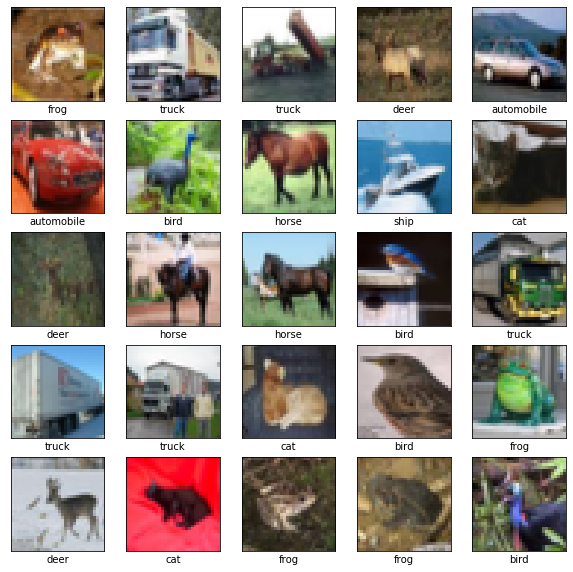

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
# 建立模型
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
# 进行编译和训练
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=1, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
50000/50000 [==============================] - 113s 2ms/sample - loss: 1.1749 - accuracy: 0.6426 - val_loss: 0.9873 - val_accuracy: 0.6813


## 3.函数介绍
在卷积神经网络中最重要的组件是：卷积层、池化层、全连接层，如今的大部分卷积神经网络基本都由这三层进行组合而成。全连接层在此不再进行详细介绍。
### 3.1keras.layers.Conv2D():二维的卷积层，重要参数有：
- **filters**: 整数，输出空间的维数（即卷积中输出滤波器的数目）。
- **kernel_size**:由2个整数组成的整数或元组/列表，指定二维卷积窗口的高度和宽度。可以是单个整数，以指定所有空间维度的相同值。
- **strides**:由两个整数组成的整数或元组/列表，指定卷积沿高度和宽度的步幅。可以是单个整数，以指定所有空间维度的相同值。
- **padding**: 填充方式："valid" or "same" ，区别如下：

1 如果padding = ‘VALID’
new_height = new_width = (W – F + 1) / S （结果向上取整）

也就是说，conv2d的VALID方式不会在原有输入的基础上添加新的像素，从公式我们看出： 我们最后得到特征图和输入尺寸，步长也和卷积核的大小都是有关系的。

2 如果padding = ‘SAME’
new_height = new_width = W / S （结果向上取整），从结果我们可以看出：我们最后得到的特征图和输入尺寸和步长有关系，但是和卷积核大小无关，填充是用0填充的。 这个具体理论解释网上有很多，大家可以参考Tensorflow中padding的两种类型SAME和VALID， tensorflow conv2d的padding解释以及参数解释
### 3.2 keras.layers.MaxPooling2D():二维的池化层，重要参数有：
- **pool_size**: 两个整数的整数或元组，用来缩小比例的因子（垂直、水平）。（2，2）将两个空间维度的输入减半。如果只指定一个整数，则两个维度将使用相同的窗口长度。
- **strides**:整数、2个整数的元组或无。跨越价值观。如果没有，则默认为池大小。
- **padding**:填充方式："valid" or "same"。

### 3.2layers.Flatten():展开层
将二维矩阵展成一维向量。
If inputs are shaped (batch,) without a channel dimension, then flattening adds an extra channel dimension and output shapes are (batch, 1).

In [ ]:
model = Sequential()
model.add(Convolution2D(64, 3, 3,
                border_mode='same',
                input_shape=(3, 32, 32)))
#模型输出：(None, 64, 32, 32)

model.add(Flatten())
# 输出维度：(None, 65536) 65*32*32

